## Load geo data


This post shows how to build a choropleth map for US counties. County border coordinates have been found here and stored on github [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson). Let's load this data stored at `geojson` format with `geopandas`, and draw a map with it thanks to `geoplot`.


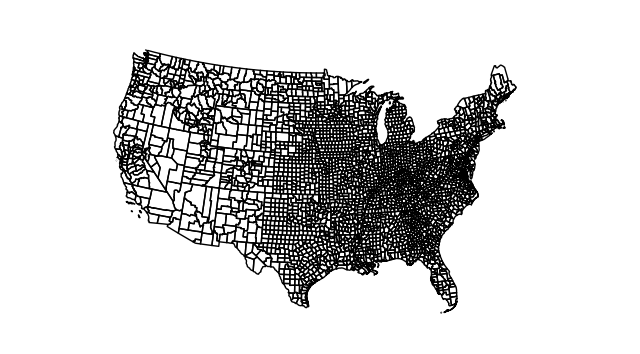

In [4]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt

# Load the json file with county coordinates
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

# Make sure the "id" column is an integer
geoData.id = geoData['id'].astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
statesToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(statesToRemove)]

# Basic plot with just county outlines
gplt.polyplot(
    geoData,
    projection=gcrs.AlbersEqualArea()
)
plt.show()

**Note**: if you need more explanation on this step, there is this [dedicated post](https://python-graph-gallery.com/map-read-geojson-with-python-geopandas). More generally, have a look to the [background map](https://python-graph-gallery.com/map) section of the python graph gallery.


## Load numeric data


A choropleth map shows the distribution of a numeric **variable on each items** of a map. Let's consider the unemployment rate of each US county. Data comes from the Bureau of Labor Statistics, found [here](https://observablehq.com/@d3/choropleth) and stored [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv).

We load it directly in python using the following code:


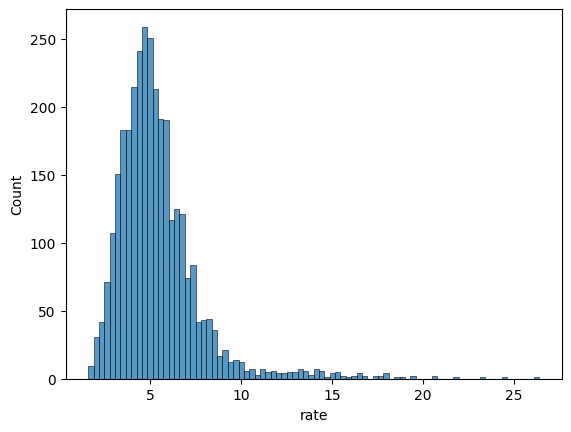

In [6]:
# library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read file
data = pd.read_csv(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv')

# Show the distribution of unemployment rate
sns.histplot(data["rate"])
plt.show()

## Merge spatial & numeric data


Both source of information need to be **merged** in order to be represented on the same figure. This can be done thanks to the `merge()` function.


In [7]:
fullData = geoData.merge(
    data,
    left_on=['id'],  # identifier from geodataframe
    right_on=['id']  # identifier from dataframe
)
fullData.head(3)

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,state,county,rate
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",Alabama,Autauga County,5.1
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",Alabama,Blount County,5.1
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",Alabama,Chambers County,5.0


## Choropleth map with `GeoPlot`

Now, the `choropleth()` function of the `geoplot` library allows to build the [choropleth](/choropleth-map) pretty easily. The `hue` parameter expects the **name of the column** we want to use to control the color of each county.

The hardest part is probably to pick the right type of color palette. `Geoplot` comes with both continuous and categorical **binning schemes**, i.e. methods that split a sequence of observations into some number of bins.


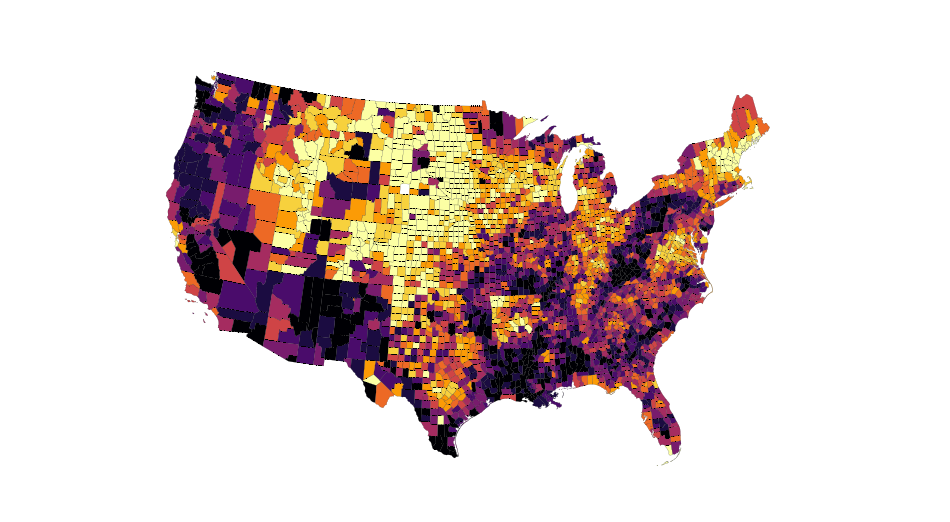

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# for color mapping with 10 different colors
import mapclassify as mc
scheme = mc.Quantiles(fullData['rate'], k=10)

# Map
gplt.choropleth(
    fullData,
    projection=gcrs.AlbersEqualArea(),
    hue="rate",
    scheme=scheme, cmap='inferno_r',
    linewidth=.1,
    edgecolor='black',
    figsize=(12, 8)
)

plt.show()

## Going further

This post explains how to create a [choropleth map](/choropleth-map) in python.

You might be interested in:

- this choropleth map with [labels inside states](/web-map-europe-with-color-by-country)
- how to create an [interactive choropleth map](/choropleth-map-plotly-python)
